 traincsv columns : Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', 'TARGET'],
      dtype='object')
 testcsv columns : Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', 'TARGET'],
      dtype='object')


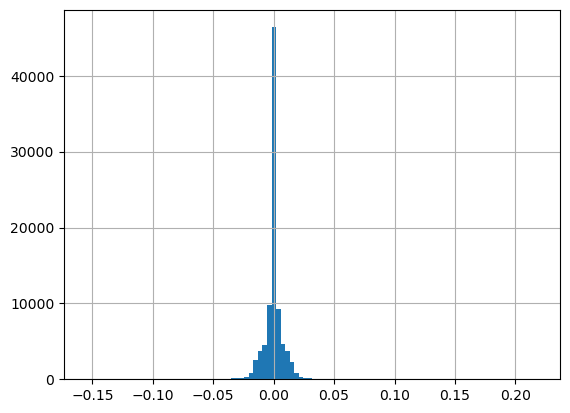

In [1]:
import pandas as pd
import sklearn.linear_model
import xgboost as xg
import numpy as np

traincsv = pd.read_csv('D1_Project_train.csv')
testcsv = pd.read_csv('D1_Project_test.csv')

traincsv = traincsv.loc[:, traincsv.columns != "Unnamed: 0"]                # drop row numbers
testcsv = testcsv.loc[:, testcsv.columns != "Unnamed: 0"]                      # drop row numbers

traincsv['TARGET'].hist(bins = 100)
print(f' traincsv columns : {traincsv.columns}')
print(f' testcsv columns : {testcsv.columns}')

In [2]:
traincsv.describe()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,TARGET
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,13365.474816,1071.217275,41413.144569,41413.140081,70.441719,7.389048,70.376194,23229.769090,23229.768350,70.376238,...,23240.851029,23229.611010,70.275744,7.361860,70.188727,23264.552056,23219.576197,71.549145,7.525900,-0.000018
std,4877.338110,6.590974,119.751346,119.750603,0.026711,0.037951,0.015646,0.681655,0.486083,0.163505,...,8279.284791,22592.451585,98.832869,96.279683,193.250530,55733.137929,5429.353037,807.900381,177.209302,0.007456
min,1360.676509,1055.893735,41133.554350,41135.249380,70.376360,6.820728,69.904333,23212.605500,23214.665950,68.359808,...,-219561.029900,-220411.452400,-2584.384588,-1730.472763,-4591.956144,-784846.949600,-179886.020000,-18469.018900,-5282.912546,-0.154823
25%,9863.794843,1065.855739,41314.544980,41315.368445,70.421158,7.369758,70.372991,23229.537335,23229.630510,70.288810,...,21860.573760,11671.079185,48.664525,-29.485785,7.534898,-3231.274488,22535.747703,-179.316365,-34.347827,-0.001740
50%,12623.982775,1072.278611,41431.236300,41432.297400,70.441679,7.389044,70.376254,23229.770985,23229.770720,70.376262,...,23229.771070,23228.218475,70.371319,7.448268,70.353191,23185.725210,23229.687545,70.828300,7.358205,0.000002
75%,15934.225878,1076.997455,41519.350160,41518.194795,70.462306,7.408451,70.379509,23230.003937,23229.910870,70.463364,...,24635.507025,34792.260763,92.289834,44.300721,134.156904,49820.993022,23924.867363,325.392806,49.962365,0.001746
max,118430.888400,1083.289247,41631.278570,41632.688790,70.507341,7.856652,71.059006,23252.083430,23249.481000,72.164583,...,163586.659600,252427.446300,4459.505439,1623.195216,4698.530506,782554.338600,135436.826300,17814.491820,2823.471082,0.218376


In [3]:
testcsv.describe()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,TARGET
count,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,...,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000
mean,9975.260164,1078.291966,41541.678104,41541.671129,70.441791,7.389215,70.376332,23229.779446,23229.776988,70.376738,...,23213.873104,23240.484030,70.435130,7.548894,70.791803,23269.179827,23201.450509,71.010758,7.240163,-0.000066
std,3934.982766,8.418171,152.946424,152.963293,0.030016,0.046835,0.018461,0.833853,0.591788,0.206634,...,7651.541509,22829.217732,96.425010,95.342708,190.685448,56250.266596,5067.001142,752.099588,163.969095,0.009020
min,325.859268,1061.267974,41231.194030,41232.291950,70.376293,7.018209,70.142222,23222.078010,23222.230240,68.434668,...,-142767.442000,-135556.195400,-2294.735733,-1482.965085,-3442.837570,-376857.699700,-99404.283480,-11171.096020,-3060.990061,-0.171370
25%,7531.492353,1070.574584,41402.658830,41402.067940,70.418640,7.364858,70.370975,23229.438815,23229.564575,70.265120,...,21382.114850,11935.704155,48.460248,-28.581785,7.072419,-2241.406844,22381.098475,-190.860051,-39.790155,-0.003099
50%,9896.037282,1080.274430,41576.505090,41576.958210,70.441713,7.389126,70.376260,23229.776020,23229.774360,70.377187,...,23229.776620,23142.410300,70.377186,7.417694,70.219467,23241.617780,23229.771070,69.875124,7.447960,0.000003
75%,12387.922035,1084.993274,41664.618950,41663.784260,70.465179,7.413640,70.381662,23230.118620,23229.988295,70.489800,...,25146.733530,34473.526190,92.707505,44.366809,134.018491,48918.672105,24070.920270,337.651272,55.045802,0.003053
max,32945.873020,1094.824199,41843.228120,41842.105650,70.507341,7.956684,70.623575,23243.345480,23239.873680,72.377451,...,100780.537300,186167.793100,1907.060081,1634.587288,3788.040760,461274.515500,89122.113170,6980.127157,1626.048157,0.138727


In [4]:
print(f' max target value : {max(traincsv["TARGET"])}, min target value : {min(traincsv["TARGET"])}')
#  max target value : 0.218375702, min target value : -0.154822771

print(traincsv['TARGET'].quantile(q=0.01))
print(traincsv['TARGET'].quantile(q=0.99))

# -0.02003159834
# 0.019718635939999982

 max target value : 0.218375702, min target value : -0.154822771
-0.02003159834
0.019718635939999982


In [ ]:
### CLIPPING
lower, upper = 0.01, 0.99

traincsv.clip(traincsv.quantile(lower), traincsv.quantile(upper), axis = 1)
testcsv.clip(testcsv.quantile(lower), testcsv.quantile(upper), axis = 1)

In [77]:
### NORMALIZATION

const = 0.001

traincsv_feat = traincsv.loc[:, traincsv.columns != "TARGET"]
traincsv_target = traincsv["TARGET"]
traincsv_ewm = traincsv_feat.ewm(alpha = const)
temp = traincsv_feat.copy()
traincsv_feat_norm = (temp - traincsv_ewm.mean())/traincsv_ewm.std()
traincsv_feat_norm.fillna(0, inplace=True)
traincsv_feat_norm = traincsv_feat_norm.loc[:, traincsv_feat_norm.columns != "mean"]
traincsv_feat_norm = traincsv_feat_norm[1:]
traincsv_target = traincsv_target[1:]

testcsv_feat = testcsv.loc[:, testcsv.columns != "TARGET"]
testcsv_target = testcsv["TARGET"]
testcsv_ewm = testcsv_feat.ewm(alpha = const)
temp = testcsv_feat.copy()
testcsv_feat_norm = (temp - testcsv_ewm.mean())/testcsv_ewm.std()
testcsv_feat_norm.fillna(0, inplace=True)
testcsv_feat_norm = testcsv_feat_norm.loc[:, testcsv_feat_norm.columns != "mean"]
testcsv_feat_norm = testcsv_feat_norm[1:]
testcsv_target = testcsv_target[1:]

In [78]:
### MODEL SELECTION

OLS = sklearn.linear_model.LinearRegression().fit(traincsv_feat_norm, traincsv_target)
OLS_score = sklearn.metrics.r2_score(testcsv_target, OLS.predict(testcsv_feat_norm))
print(f"OLS score : {OLS_score:.8f}")

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 50, 100]

for alpha in alphas:
    Ridge = sklearn.linear_model.Ridge(alpha = alpha).fit(traincsv_feat_norm, traincsv_target)
    Lasso = sklearn.linear_model.Lasso(alpha = alpha).fit(traincsv_feat_norm, traincsv_target)
    print(f"alpha : {alpha: 3.4f} / Ridge score : {sklearn.metrics.r2_score(testcsv_target, Ridge.predict(testcsv_feat_norm)): .8f}")
    print(f"alpha : {alpha: 3.4f} / Lasso score : {sklearn.metrics.r2_score(testcsv_target, Lasso.predict(testcsv_feat_norm)): .8f}")
    
    
# OLS score : 0.00255602
# alpha :  0.0010 / Ridge score :  0.00255605
# alpha :  0.0010 / Lasso score : -0.00002899
# alpha :  0.0050 / Ridge score :  0.00255615
# alpha :  0.0050 / Lasso score : -0.00002899
# alpha :  0.0100 / Ridge score :  0.00255627
# alpha :  0.0100 / Lasso score : -0.00002899
# alpha :  0.0500 / Ridge score :  0.00255725
# alpha :  0.0500 / Lasso score : -0.00002899
# alpha :  0.1000 / Ridge score :  0.00255843
# alpha :  0.1000 / Lasso score : -0.00002899
# alpha :  1.0000 / Ridge score :  0.00257580
# alpha :  1.0000 / Lasso score : -0.00002899
# alpha :  10.0000 / Ridge score :  0.00266484
# alpha :  10.0000 / Lasso score : -0.00002899
# alpha :  50.0000 / Ridge score :  0.00277931
# alpha :  50.0000 / Lasso score : -0.00002899
# alpha :  100.0000 / Ridge score :  0.00281110
# alpha :  100.0000 / Lasso score : -0.00002899

OLS score : 0.00255602
alpha :  0.0010 / Ridge score :  0.00255605
alpha :  0.0010 / Lasso score : -0.00002899
alpha :  0.0050 / Ridge score :  0.00255615
alpha :  0.0050 / Lasso score : -0.00002899
alpha :  0.0100 / Ridge score :  0.00255627
alpha :  0.0100 / Lasso score : -0.00002899
alpha :  0.0500 / Ridge score :  0.00255725
alpha :  0.0500 / Lasso score : -0.00002899
alpha :  0.1000 / Ridge score :  0.00255843
alpha :  0.1000 / Lasso score : -0.00002899
alpha :  1.0000 / Ridge score :  0.00257580
alpha :  1.0000 / Lasso score : -0.00002899
alpha :  10.0000 / Ridge score :  0.00266484
alpha :  10.0000 / Lasso score : -0.00002899
alpha :  50.0000 / Ridge score :  0.00277931
alpha :  50.0000 / Lasso score : -0.00002899
alpha :  100.0000 / Ridge score :  0.00281110
alpha :  100.0000 / Lasso score : -0.00002899


In [37]:
### IDEAL PROFIT: 100% correct model

ideal_return = 0
for number in testcsv_target:
    ideal_return += number * (number > 0)
print(ideal_return)

# 55.95181379600008

55.95181379600008


In [60]:
### actual trading model

my_return = 0
final_model = sklearn.linear_model.Ridge(alpha = 100).fit(traincsv_feat_norm, traincsv_target)
testcsv_predict = final_model.predict(testcsv_feat_norm)

count = len(testcsv_target)
correct = 0
for i in range(count):
    my_return += testcsv_target.iloc[i] * (testcsv_predict[i] > 0)
    correct += (testcsv_target.iloc[i] * testcsv_predict[i] > 0)
print(f'my final return is {my_return: .10f} out of {ideal_return: .10f}')
print(f'up/down prediction score : {correct / count * 100}% win rate')


# my final return is  3.7141212272 out of  55.9518137960
# up/down prediction score : 48.63493352278494% win rate

my final return is  3.7141212272 out of  55.9518137960
up/down prediction score : 48.63493352278494% win rate


### THOUGHTS

* Can clipping be done in a better way, rather than considering a quantile? we can also abort those outlier rows.
* There might be a better constant than 0.001 for the moving window average constant.
* Ridge regression gives the best performance when the penalizing constant is larger than 100. There must be a way to
 handle this problem.
* Does normalizing the "TARGET" give a better result? Doubt about it.
* What about XGboost model?

In [75]:
### XGboost try

traincsv_feat = traincsv.drop(columns = ["TARGET", "mean"])
traincsv_target = traincsv["TARGET"]
testcsv_feat = testcsv.drop(columns = ["TARGET"])
testcsv_target = testcsv["TARGET"]
# XGboost does not require normalization process

count = len(testcsv_target)

estimators = [50, 100, 500, 1000, 5000]
for estimator in estimators:
    xgLR = xg.XGBRegressor(n_estimators = estimator, max_depth = 3).fit(traincsv_feat, traincsv_target)
    r2_xgLR = sklearn.metrics.r2_score(testcsv_target, xgLR.predict(testcsv_feat))
    print(f'estimator : {estimator: 5f} / regression via xgboost r2 score : {r2_xgLR: .6f}')
    testcsv_predict = xgLR.predict(testcsv_feat)
    correct = 0
    for i in range(count):
        my_return += testcsv_target.iloc[i] * (testcsv_predict[i] > 0)
        correct += (testcsv_target.iloc[i] * testcsv_predict[i] > 0)
    print(f'my final return is {my_return: .10f} out of {ideal_return: .10f}')
    print(f'up/down prediction score : {correct / count * 100}% win rate')


# estimator :  50.000000 / regression via xgboost r2 score : -1.227095
# my final return is  8.5472560364 out of  55.9518137960
# up/down prediction score : 49.32257573451058% win rate
# estimator :  100.000000 / regression via xgboost r2 score : -1.620240
# my final return is  11.7856402696 out of  55.9518137960
# up/down prediction score : 49.70822550362815% win rate
# estimator :  500.000000 / regression via xgboost r2 score : -1.886139
# my final return is  14.9610428778 out of  55.9518137960
# up/down prediction score : 49.93149642259096% win rate
# estimator :  1000.000000 / regression via xgboost r2 score : -1.942191
# my final return is  17.6335478630 out of  55.9518137960
# up/down prediction score : 49.89090171005227% win rate
# estimator :  5000.000000 / regression via xgboost r2 score : -1.812021
# my final return is  19.9309850482 out of  55.9518137960
# up/down prediction score : 50.59623484041204% win rate



estimator :  50.000000 / regression via xgboost r2 score : -1.227095
my final return is  8.5472560364 out of  55.9518137960
up/down prediction score : 49.32257573451058% win rate
estimator :  100.000000 / regression via xgboost r2 score : -1.620240
my final return is  11.7856402696 out of  55.9518137960
up/down prediction score : 49.70822550362815% win rate
estimator :  500.000000 / regression via xgboost r2 score : -1.886139
my final return is  14.9610428778 out of  55.9518137960
up/down prediction score : 49.93149642259096% win rate
estimator :  1000.000000 / regression via xgboost r2 score : -1.942191
my final return is  17.6335478630 out of  55.9518137960
up/down prediction score : 49.89090171005227% win rate
estimator :  5000.000000 / regression via xgboost r2 score : -1.812021
my final return is  19.9309850482 out of  55.9518137960
up/down prediction score : 50.59623484041204% win rate


### Conclusion

XGboost does not give the best r2 score, nonetheless, in terms of actual return XGboost was the best. We may try more
 leaves to figure out the best return but calculation power was not enough at my local pc.

Final model : XGboost with 5000 estimators, 3 layers, only with clippings.


# my final return is  19.9309850482 out of  55.9518137960
# up/down prediction score : 50.59623484041204% win rate